In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils.quack import Quack

In [46]:
rushes = Quack.query("""
with raw as (
select pbp.desc,pbp.game_id, pbp.yards_gained,ids.gsis_id,
					 pbp.season,
					 pbp.week,
					 pbp.ydstogo,
					 pbp.down,
					 pbp.touchdown,
	case when pbp.down = 1 then 1 else 0 end as is_first_down,
	case when pbp.down = 2 then 1 else 0 end as is_second_down,
	case when pbp.down = 3 then 1 else 0 end as is_third_down,
	case when pbp.down = 4 then 1 else 0 end as is_fourth_down,
	case when yards_gained <= 0 then 1 else 0 end as stuffed,
	case when yards_gained >= ydstogo and ydstogo <= 2 then 1 
		 when yards_gained <= ydstogo and ydstogo <= 2 then 0 end as short_first,
	case when yards_gained < ydstogo and (yards_gained <= 3 and yards_gained >= 1) then 1 else 0 end as mediocre,
	case when yards_gained between 3 and 9 then 1 else 0 end as decent_run,
	case when yards_gained >= 10 then 1 else 0 end as explosive,
	case when yards_gained >= 20 then 1 else 0 end as huge_play,
					 epa,
	pbp.first_down, pbp.touchdown
    ,rusher_player_name
    ,rusher_id,
	season,
	week,
	qb_scramble,
					 ids.name
	from pbp 
	join ids on pbp.rusher_id = ids.gsis_id
	where pbp.play_type = 'run'
	and pbp.yards_gained is not null
	and pbp.down is not null
	and pbp.penalty = 0
	and pbp.fumble = 0
	and season > 2000
	)
	select  
* from raw
order by season, week
""")

rushes

,desc,game_id,yards_gained,gsis_id,season,week,ydstogo,down,touchdown,is_first_down,...,huge_play,epa,first_down,touchdown_1,rusher_player_name,rusher_id,season_1,week_1,qb_scramble,name
0,(4:32) 49-T.Richardson to LV 29 for -1 yards (...,2001_01_OAK_KC,-1.0,00-0013694,2001,1,10.0,2.0,0.0,0,...,0,-0.916144,0.0,0.0,T. Richardson,00-0013694,2001,1,0.0,Tony Richardson
1,(14:52) 49-T.Richardson right end to KC 22 for...,2001_01_OAK_KC,2.0,00-0013694,2001,1,10.0,1.0,0.0,1,...,0,-0.527541,0.0,0.0,T. Richardson,00-0013694,2001,1,0.0,Tony Richardson
2,(13:06) 49-T.Richardson up the middle to KC 31...,2001_01_OAK_KC,-2.0,00-0013694,2001,1,10.0,1.0,0.0,1,...,0,-0.891649,0.0,0.0,T. Richardson,00-0013694,2001,1,0.0,Tony Richardson
3,(6:49) 49-T.Richardson up the middle to LV 13 ...,2001_01_OAK_KC,-1.0,00-0013694,2001,1,10.0,1.0,0.0,1,...,0,-0.675594,0.0,0.0,T. Richardson,00-0013694,2001,1,0.0,Tony Richardson
4,(:37) 49-T.Richardson up the middle to KC 32 f...,2001_01_OAK_KC,2.0,00-0013694,2001,1,10.0,1.0,0.0,1,...,0,-0.391140,0.0,0.0,T. Richardson,00-0013694,2001,1,0.0,Tony Richardson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259735,(10:14) 4-J.Cook right guard to HOU 25 for -2 ...,2025_12_BUF_HOU,-2.0,00-0037248,2025,12,1.0,4.0,0.0,0,...,0,-4.483177,0.0,0.0,J.Cook,00-0037248,2025,12,0.0,James Cook
259736,(10:09) 57-B.Fisher reported in as eligible. 2...,2025_12_BUF_HOU,1.0,00-0040583,2025,12,10.0,1.0,0.0,1,...,0,-0.624425,0.0,0.0,W.Marks,00-0040583,2025,12,0.0,Woody Marks
259737,(4:59) 57-B.Fisher reported in as eligible. 21...,2025_12_BUF_HOU,0.0,00-0034791,2025,12,10.0,1.0,0.0,1,...,0,-0.473238,0.0,0.0,N.Chubb,00-0034791,2025,12,0.0,Nick Chubb
259738,(2:13) 4-J.Cook left guard to BUF 27 for 3 yar...,2025_12_BUF_HOU,3.0,00-0037248,2025,12,4.0,2.0,0.0,0,...,0,-0.148578,0.0,0.0,J.Cook,00-0037248,2025,12,0.0,James Cook


In [47]:
cnt = rushes[['name', 'gsis_id']].value_counts().reset_index()
#cnt = cnt.loc[cnt['count'] > 80]
cnt.head(15)

,name,gsis_id,count
0,Frank Gore,00-0023500,3787
1,Adrian Peterson,00-0025394,3267
2,LaDainian Tomlinson,00-0020536,3233
3,Steven Jackson,00-0022736,2747
4,Derrick Henry,00-0032764,2645
5,Thomas Jones,00-0019641,2636
6,Marshawn Lynch,00-0025399,2599
7,LeSean McCoy,00-0027029,2462
8,Matt Forte,00-0026184,2352
9,Clinton Portis,00-0021179,2238


In [48]:
cnt.loc[cnt.name=='James Conner']

,name,gsis_id,count
45,James Conner,00-0033553,1372


In [49]:
lg_avg = rushes[['stuffed','mediocre', 'explosive', 'huge_play', 'first_down', 'short_first', 'epa', 'yards_gained']].mean()
lg_avg = lg_avg.to_frame().T
padding = cnt.merge(lg_avg, how='cross')
padding = pd.concat([padding] * 20, ignore_index=True)
padding['season'] = 2000
padding['week'] = 1

In [50]:
lg_avg

,stuffed,mediocre,explosive,huge_play,first_down,short_first,epa,yards_gained
0,0.188177,0.314707,0.107946,0.024636,0.233942,0.683126,-0.024439,4.286748


In [51]:
data = pd.concat((rushes[['name','gsis_id','stuffed','mediocre', 'explosive', 'huge_play', 'first_down', 'short_first', 'epa', 'yards_gained', 'season','week', 'game_id']], padding)).sort_values(by=['season','week','name'])

In [57]:
mean = data.groupby(['name', 'gsis_id'])[['stuffed','mediocre', 'explosive', 'huge_play', 'first_down', 'short_first', 'epa', 'yards_gained']].transform(lambda x: x.ewm(span=150, min_periods=10).mean())
#mean = mean.merge(cnt)
mean[['season','week','name','game_id','gsis_id']] = data[['season','week','name','game_id','gsis_id']]
mean = mean.groupby(['name','gsis_id','season','week', 'game_id']).tail(1)
mean = mean.drop('yards_gained', axis=1)

In [58]:
mean

,stuffed,mediocre,explosive,huge_play,first_down,short_first,epa,season,week,name,game_id,gsis_id
109,0.164515,0.390727,0.148364,0.073198,0.213114,0.700530,0.198745,2001,1,Ahman Green,2001_01_DET_GB,00-0006305
110,0.272206,0.282133,0.096773,0.022086,0.209727,0.645607,-0.177985,2001,1,Brett Favre,2001_01_DET_GB,00-0005106
100,0.168699,0.282133,0.096773,0.022086,0.261136,0.700311,0.008588,2001,1,Charlie Batch,2001_01_DET_GB,00-0000865
43,0.181087,0.275554,0.123638,0.018171,0.304042,0.716723,0.072199,2001,1,Donovan McNabb,2001_01_STL_PHI,00-0011022
30,0.204757,0.306508,0.118137,0.062442,0.213781,0.700311,-0.151285,2001,1,Fred Taylor,2001_01_PIT_JAX,00-0016098
...,...,...,...,...,...,...,...,...,...,...,...,...
259713,0.200213,0.301491,0.087474,0.019964,0.189574,0.683126,-0.059525,2025,12,Jaylin Noel,2025_12_BUF_HOU,00-0040138
259699,0.168858,0.108993,0.068972,0.011403,0.635327,0.813815,0.476163,2025,12,Josh Allen,2025_12_BUF_HOU,00-0034857
259737,0.188723,0.280162,0.068934,0.013822,0.179085,0.546714,-0.084951,2025,12,Nick Chubb,2025_12_BUF_HOU,00-0034791
259739,0.181570,0.265129,0.109628,0.008227,0.243296,0.671129,0.021868,2025,12,Ty Johnson,2025_12_BUF_HOU,00-0035537


In [59]:
#Quack.query('create or replace table rusher_adv as select * from mean')
import duckdb

# Assuming 'mean' is your Pandas DataFrame
con = duckdb.connect("data/nfl.duckdb")

# Register the DataFrame
con.register("mean_df", mean)

# Now you can create a DuckDB table from it
con.execute("CREATE OR REPLACE TABLE rusher_adv AS SELECT * FROM mean_df")
con.close()

In [60]:
con.close()

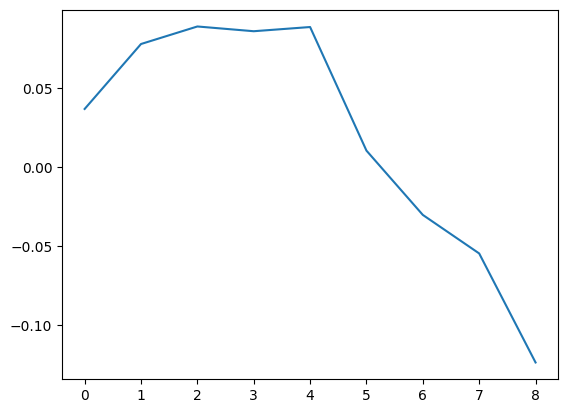

In [61]:
out = mean.loc[mean.name=="Quinshon Judkins"].copy().reset_index(drop=True)
out = out.groupby(['name','gsis_id','season','week']).tail(1)
plt.plot(out['epa'])